Analýza dát
===========
Zámerom nášho projektu je natrénovať konvolučnú neurónovú sieť, aby dokázala filtrovať zašumený obraz. Náš dataset predstavuje množina dvojíc zašumený obraz-bezchybný obraz.

## Pôvod datasetu
Použitý dataset pozostáva zo skupiny 200 dvojíc obrázkov zachytávajúcich rôzne scény, vyhotovených na pätici rôznych smartfónov. Celý dataset je dostupný na tejto [stránke](https://www.eecs.yorku.ca/~kamel/sidd/dataset.php).

Obrázky sú vo vysokom rozlíšení, čo sa prejavuje aj na ich veľkosti. Malá verziu tohoto datasetu, ktorá pozostáva z menšieho počtu obrázkov a ktorú sme použili na trénovanie, má veľkosť vyše 6 GB.

## Ukážky
### Zašumený obrázok
![Zašumený obrázok](/images/NOISY_SRGB_010.PNG "Zašumený obrázok")  
### Ground truth obrázok
![Ground truth obrázok](/images/GT_SRGB_010.PNG "Ground truth obrázok")

Rozdiel medzi zašumeným a GT obrázkom je lepšie viditeľný pri väčšom priblížení, prípadne po predspracovaní. 


## Predspracovanie dát
Pri obrázkoch takejto veľkosti nie je rozumné ich spracúvať celé naraz, aj z dôvodu možného nedostatku pamäte. V rámci predspracovania sa preto tieto obrázky rozdelia na „kachlíky“ s rozmerom 140*140px, na ktorých sa sieť trénuje. 

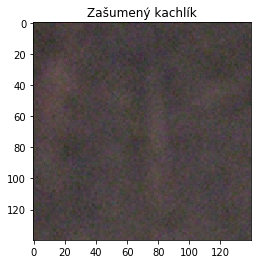

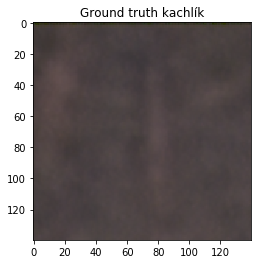

In [10]:
from utils import load_image_data
import matplotlib.pyplot as plt

data = load_image_data([5]).unbatch().skip(20).take(1)
for img in data:
    plt.figure()
    plt.imshow(img[0])
    plt.title('Zašumený kachlík')
    plt.show()
    plt.figure()
    plt.imshow(img[1])
    plt.title('Ground truth kachlík')
    plt.show()

Pri odstraňovaní šumu s natrénovanou sieťou sa obrázok rozdelí, pre každý kachlík sa vytvorí predikcia a následne sa tieto predikcie spoja naspäť do celého obrázku.

## Validácia
Naša neurónová sieť sa pri trénovaní validuje na podmnožine predspracovaných (rozdelených na kachlíky) obrázkov, ktorá bola pred trénovaním oddelená od ostatných.

## Spôsob vyhodnocovania
V baseline riešení používame najmä subjektívne vyhodnotenie, teda či sa očividne zvýšila kvalita obrázka a či z neho zmizol šum.

V rámci objektívneho vyhodnocovania výsledkov našej neurónovej siete pri rôznych nastaveniach hyperparametrov využijeme absolútny rozdiel pixelových hodnôt bezchybného obrazu na vstupe a výsledného obrazu po predikcii našou neurónovou sieťou. Vizualizácia tohto rozdielu nám pomôže odhaliť, ktoré prvky či javy obrazu robia sieti problémy a s ktorými sa naopak dokáže vysporiadať.